# Feature Extraction

This notebook extracts the following features from images and saves them in a csv file:
* The outer contour's aspect ratio
* Number of corners detected via Harris Corner Detection
* Number of corners detected via Shi-Tomasi Corner Detection
* The outer contour's perimeter-area ratio

### Required Imports

In [5]:
import os
import pandas as pd
import numpy as np

import cv2

import modules.feature_extraction as fe

### Specify Paths for Loading and Saving Data

In [6]:
rel_imgpath = os.path.join("data", "images", "original")
csvpath = os.path.join("data","features.csv")

### Select the Images, Class Names and Class Indices to Be Used

In [3]:
imgpaths = []
for dirpath, dirnames, filenames in os.walk(rel_imgpath):
    if dirnames:
        classes = {}
        for index, name in enumerate(dirnames):
            classes[name]=index
    for filename in filenames:
        imgpaths.append(os.path.join(dirpath, filename))

print(f"Found {len(imgpaths)} images.")
print("Class names and corresponding indices:", classes)

Found 729 images.
Class names and corresponding indices: {'bottleOpener': 0, 'canOpener': 1, 'corcScrew': 2, 'multiTool': 3}


### Extract the Features

In [4]:
# features = ["Relative Image Path",
#            "Class Name",
#            "Class Index",
#            "Aspect Ratio",
#            "Number of Corners (Harris)",
#            "Number of Corners (Shi-Tomasi)",
#            "Perimeter Area Ratio"]

# df = pd.DataFrame(columns=features)

# show_img = len(imgpaths)//3 
# imgs2show = ["original", "prepared", "canny", "canny closed gaps", "contours", "max area contour", "harris", "shi-tomasi"]

# for i, path in enumerate(imgpaths):
#     c = path.split(os.sep)[-2]
#     img = fe.prepared_image(path)
    
#     row = []
#     row.append(path)
#     row.append(c) 
#     row.append(float(classes[c]))
#     row.append(fe.aspect_ratio(img)) 
#     row.append(float(fe.num_corners(img, detector="harris")))
#     row.append(float(fe.num_corners(img, detector="shi-tomasi")))
#     row.append(fe.perimeter_area_ratio(img))
    
#     row = pd.Series(row, index=features)
#     df = df.append(row, ignore_index=True)
    
#     print(str(format((100./len(imgpaths))*i, ".2f"))+" %", end="\r")
    
#     if not i%show_img:
#         for img_name in imgs2show[:-1]:
#             fe.display_image(fe.images[img_name], title=img_name, destroy=False)
#         fe.display_image(fe.images[imgs2show[-1]], title=imgs2show[-1])


df = fe.extract_features(imgpaths, classes)

print("----- Information on the feature dataframe: ----------------------")
df.info()
print("------------------------------------------------------------------")

----- Information on the feature dataframe: ----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Relative Image Path             729 non-null    object 
 1   Class Name                      729 non-null    object 
 2   Class Index                     729 non-null    float64
 3   Aspect Ratio                    729 non-null    float64
 4   Number of Corners (Harris)      729 non-null    float64
 5   Number of Corners (Shi-Tomasi)  729 non-null    float64
 6   Perimeter Area Ratio            729 non-null    float64
dtypes: float64(5), object(2)
memory usage: 40.0+ KB
------------------------------------------------------------------


### Save Data as CSV File

In [5]:
df.to_csv(csvpath,';')

### Create Scatter Matrix

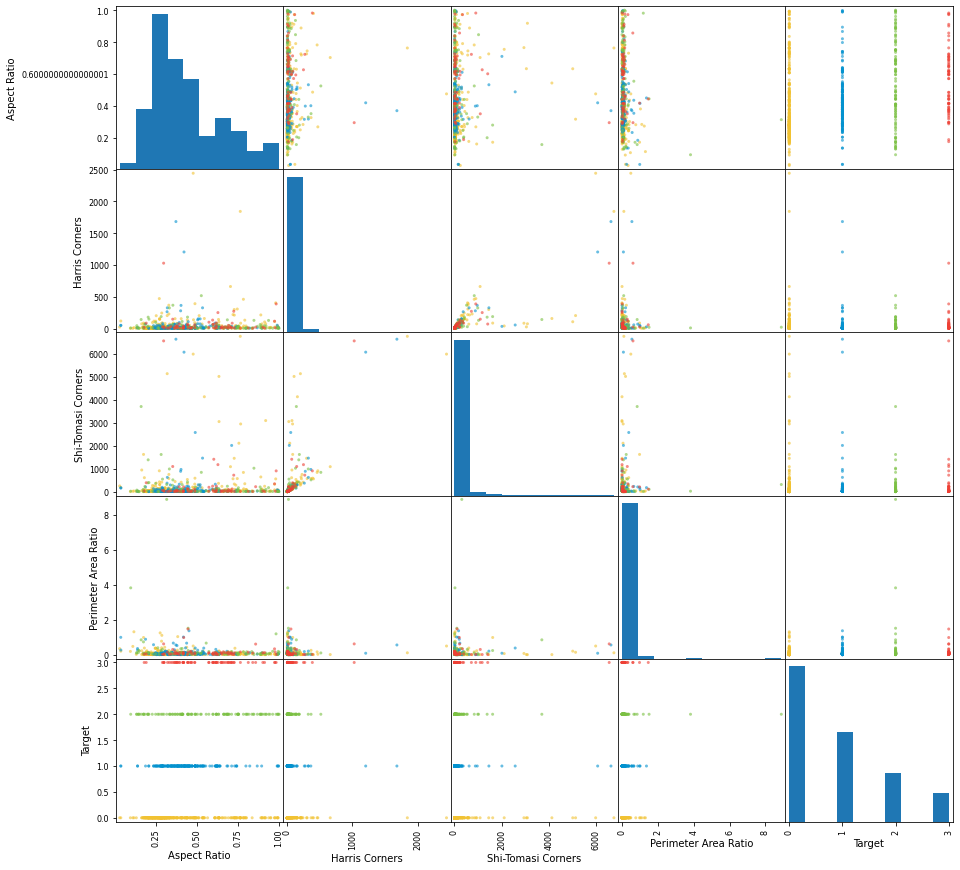

In [14]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets

df = pd.read_csv(csvpath, sep=';', header=None)

# Shave off unnecessary data
df = df.iloc[1:, 3:]
# Put classification column at the end
df = df.reindex(columns=[4, 5, 6, 7, 3])
# Convert all entries to numbers
df = df.apply(pd.to_numeric, errors='coerce')
# Rename the columns
df = df.rename(columns={4: "Aspect Ratio", 5: "Harris Corners", 6: "Shi-Tomasi Corners" , 7: "Perimeter Area Ratio", 3:"Target"})

# 0: dark yellow, 1: blue, 2: green, 3: red
color_wheel = {0: "#f1c232",
               1: "#0392cf",
               2: "#7bc043", 
               3: "#ee4035"}
colors = df["Target"].map(lambda x: color_wheel.get(x))
ax = scatter_matrix(df, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')